<a href="https://colab.research.google.com/github/AryanAhmadChaudhary/NLP/blob/main/quora_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Classification with bag of words**

Outline:
- Download and Explore the data
- Apply text preprocessing
- Implement the BOW model
- Train ML models for text classification
- Make predictions and submit to kaggle

## Download and Explore the data
Outline:
- Download the dataset from Kaggle
- Explore the data using Pandas
- Create a small working sample

### Download the Dataset from Kaggle

In [6]:
import os

In [7]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [8]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data

 95% 52.0M/54.9M [00:03<00:00, 21.1MB/s]
100% 54.9M/54.9M [00:03<00:00, 15.0MB/s]


In [9]:
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data

 88% 14.0M/15.8M [00:01<00:00, 13.6MB/s]
100% 15.8M/15.8M [00:01<00:00, 10.6MB/s]


In [10]:
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

 98% 4.00M/4.09M [00:00<00:00, 5.91MB/s]
100% 4.09M/4.09M [00:00<00:00, 4.40MB/s]


### Explore the Data using Pandas

In [11]:
train_fname = 'data/train.csv.zip'
test_fname = 'data/test.csv.zip'
sample_fname = 'data/sample_submission.csv.zip'

In [12]:
import pandas as pd

In [13]:
raw_df = pd.read_csv(train_fname)

In [14]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [15]:
sincere_df = raw_df[raw_df['target'] == 0]
insincere_df = raw_df[raw_df['target'] == 1]

In [16]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [17]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [18]:
raw_df.target.value_counts(normalize = 'True')

,proportion
target,
0,0.93813
1,0.06187


<Axes: xlabel='target'>

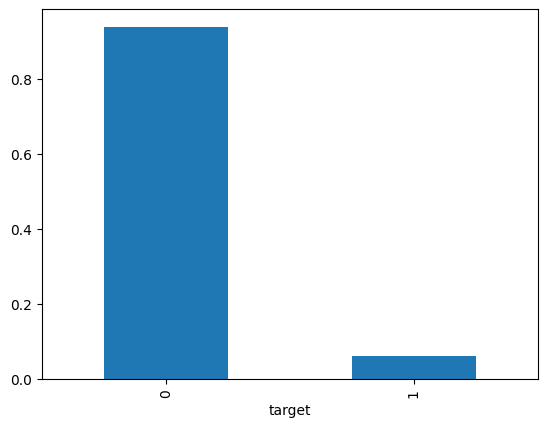

In [19]:
raw_df.target.value_counts(normalize = 'True').plot(kind = 'bar')

In [20]:
test_df = pd.read_csv(test_fname)

In [21]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [22]:
sub_df = pd.read_csv(sample_fname)

In [23]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


### Create a Working Sample

In [24]:
SAMPLE_SIZE = 100_000

In [25]:
sample_df = raw_df.sample(SAMPLE_SIZE, random_state = 42)

In [26]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


## Apply text preprocessing
Outline:
- Tokenization
- Stopword removal
- Stemming

### Tokenization


In [29]:
q0 = sincere_df.question_text.values[1]

In [30]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [31]:
q1 = raw_df[raw_df.target==1].question_text.values[1]

In [32]:
q1

'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?'

In [36]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [37]:
from nltk.tokenize import word_tokenize

In [41]:
q0_tok = word_tokenize(q0)
q0_tok

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [42]:
q1_tok = word_tokenize(q1)
q1_tok

['Which',
 'babies',
 'are',
 'more',
 'sweeter',
 'to',
 'their',
 'parents',
 '?',
 'Dark',
 'skin',
 'babies',
 'or',
 'light',
 'skin',
 'babies',
 '?']

### Stopwords Removal


In [43]:
from nltk.corpus import stopwords

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
english_stopwords = stopwords.words('english')

In [46]:
def remove_stopwords(tokens):
  return [t for t in tokens if t.lower() not in english_stopwords]

In [48]:
q0_stp = remove_stopwords(q0_tok)
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [49]:
q1_stp = remove_stopwords(q1_tok)
q1_stp

['babies',
 'sweeter',
 'parents',
 '?',
 'Dark',
 'skin',
 'babies',
 'light',
 'skin',
 'babies',
 '?']

### Stemming

In [50]:
from nltk.stem.snowball import SnowballStemmer

In [51]:
stemmer = SnowballStemmer('english')

In [53]:
stemmer.stem('going')

'go'

In [54]:
q0_stem = [stemmer.stem(t) for t in q0_stp]
q0_stem

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

In [55]:
q1_stem = [stemmer.stem(t) for t in q1_stp]
q1_stem

['babi',
 'sweeter',
 'parent',
 '?',
 'dark',
 'skin',
 'babi',
 'light',
 'skin',
 'babi',
 '?']

## Implement the BOW model
Outline:
- Create a vocabulary using Count Vectorizer
- Transform text to vectors using Count Vectorizer
- Configure text preprocessing in Count Vectorizer

### Create a vocabulary using Count Vectorizer

In [56]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [57]:
small_df = sample_df[:5]

In [58]:
small_df.question_text.values

array(['What is the most effective classroom management skill/technique to create a good learning environment?',
       'Can I study abroad after 10th class from Bangladesh?',
       'How can I make friends as a college junior?',
       'How do I download free APK Minecraft: Pocket Edition for iOS (iPhone)?',
       'Like Kuvera, is "Groww" also a free online investment platform where I can invest in direct mutual funds?'],
      dtype=object)

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
small_vect = CountVectorizer()

In [61]:
small_vect.fit(small_df.question_text)

CountVectorizer()

In [62]:
small_vect.vocabulary_

{'what': 49,
 'is': 31,
 'the': 47,
 'most': 39,
 'effective': 16,
 'classroom': 9,
 'management': 37,
 'skill': 44,
 'technique': 46,
 'to': 48,
 'create': 11,
 'good': 23,
 'learning': 34,
 'environment': 17,
 'can': 7,
 'study': 45,
 'abroad': 1,
 'after': 2,
 '10th': 0,
 'class': 8,
 'from': 21,
 'bangladesh': 6,
 'how': 25,
 'make': 36,
 'friends': 20,
 'as': 5,
 'college': 10,
 'junior': 32,
 'do': 13,
 'download': 14,
 'free': 19,
 'apk': 4,
 'minecraft': 38,
 'pocket': 43,
 'edition': 15,
 'for': 18,
 'ios': 29,
 'iphone': 30,
 'like': 35,
 'kuvera': 33,
 'groww': 24,
 'also': 3,
 'online': 41,
 'investment': 28,
 'platform': 42,
 'where': 50,
 'invest': 27,
 'in': 26,
 'direct': 12,
 'mutual': 40,
 'funds': 22}

In [63]:
small_vect.get_feature_names_out()

array(['10th', 'abroad', 'after', 'also', 'apk', 'as', 'bangladesh',
       'can', 'class', 'classroom', 'college', 'create', 'direct', 'do',
       'download', 'edition', 'effective', 'environment', 'for', 'free',
       'friends', 'from', 'funds', 'good', 'groww', 'how', 'in', 'invest',
       'investment', 'ios', 'iphone', 'is', 'junior', 'kuvera',
       'learning', 'like', 'make', 'management', 'minecraft', 'most',
       'mutual', 'online', 'platform', 'pocket', 'skill', 'study',
       'technique', 'the', 'to', 'what', 'where'], dtype=object)

### Transform text to vectors using Count Vectorizer

In [65]:
vectors = small_vect.transform(small_df.question_text)

In [66]:
vectors

<5x51 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [69]:
vectors.shape

(5, 51)

In [68]:
vectors.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1]])

### Configure text preprocessing in Count Vectorizer

In [80]:
stemmer = SnowballStemmer('english')

In [81]:
def tokenize(text):
  return [stemmer.stem(word) for word in word_tokenize(text)]

In [82]:
small_df.question_text.values[0]

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [83]:
tokenize(small_df.question_text.values[0])

['what',
 'is',
 'the',
 'most',
 'effect',
 'classroom',
 'manag',
 'skill/techniqu',
 'to',
 'creat',
 'a',
 'good',
 'learn',
 'environ',
 '?']

In [84]:
vectorizer = CountVectorizer(
    lowercase = True,
    stop_words = english_stopwords,
    tokenizer = tokenize,
    max_features = 1000
)

In [85]:
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x78450773bd90>)

In [86]:
len(vectorizer.vocabulary_)

1000

In [87]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'agre', 'air',
       'allow', 'almost', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'amount', 'analysi', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

In [88]:
inputs = vectorizer.transform(sample_df.question_text)

In [90]:
inputs.shape

(100000, 1000)

In [92]:
inputs[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [93]:
test_inputs = vectorizer.transform(test_df.question_text)

## Train ML models for text classification

Outline:
- Create a training and validation set
- Train a logistic regression model
- Makr predictions on training, validation & test data

### Create a training and validation set

In [94]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [95]:
inputs.shape

(100000, 1000)

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs, sample_df.target, test_size = 0.3, random_state = 42
)

In [99]:
train_inputs.shape

(70000, 1000)

In [100]:
train_targets.shape

(70000,)

In [101]:
val_inputs.shape

(30000, 1000)

In [102]:
val_targets.shape

(30000,)

### Train a logistic regression model

In [103]:
from sklearn.linear_model import LogisticRegression

In [114]:
MAX_ITER = 1000

In [115]:
model = LogisticRegression(max_iter=MAX_ITER,solver = 'sag')

In [116]:
model.fit(train_inputs, train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='sag')

### Make predictions using the model

In [117]:
train_preds = model.predict(train_inputs)

In [118]:
pd.Series(train_preds).value_counts()

,count
0,67957
1,2043


In [119]:
pd.Series(train_targets).value_counts()

,count
target,
0,65784
1,4216


In [123]:
from sklearn.metrics import accuracy_score

In [124]:
accuracy_score(train_targets, train_preds)

0.9504428571428571

In [128]:
import numpy as np

In [130]:
accuracy_score(train_targets, np.zeros(len(train_preds)))

0.9397714285714286

In [131]:
from sklearn.metrics import f1_score

In [132]:
f1_score(train_targets, train_preds)

0.4457581083240134

In [135]:
f1_score(train_targets, np.zeros(len(train_preds)))

0.0

In [134]:
f1_score(train_targets, np.random.choice((0,1),len(train_preds)))

0.1082626902257175

In [136]:
val_preds = model.predict(val_inputs)

In [137]:
accuracy_score(val_targets, val_preds)

0.9467

In [138]:
f1_score(val_targets, val_preds)

0.40843507214206437

In [139]:
sincere_df.question_text.values[0:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [141]:
sincere_df.target.values[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [140]:
model.predict(vectorizer.transform(sincere_df.question_text.values[0:10]))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [142]:
insincere_df.question_text.values[0:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [143]:
insincere_df.target.values[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [144]:
model.predict(vectorizer.transform(insincere_df.question_text.values[0:10]))

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

## Make predictions and submit to kaggle

In [145]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [146]:
test_inputs.shape

(375806, 1000)

In [147]:
test_preds = model.predict(test_inputs)

In [148]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [151]:
sub_df.prediction = test_preds

In [152]:
sub_df.prediction.value_counts()

,count
prediction,
0,364963
1,10843


In [153]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [154]:
sub_df.to_csv('submission.csv', index = None)